In [1]:
import pandas as pd
import numpy as np
import os
import folium
from folium import plugins
import webbrowser
# import osmnx
# import geopandas as gp
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sp_data = pd.read_csv('../data/singapore_listings.csv')
sp_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [5]:
lat = sp_data['latitude'].values
lon = sp_data['longitude'].values

In [5]:
sp_map = folium.Map(location=[sp_data['latitude'].mean(), sp_data['longitude'].mean()], zoom_start = 10)
marker_cluster = plugins.MarkerCluster().add_to(sp_map)
for i in range(len(lat)):
     folium.Marker([lat[i], lon[i]], popup='<i>Mt. Hood Meadows</i>').add_to(marker_cluster)     
# sp_map.save("sp_map.html")
# webbrowser.open("sp_map.html")

In [6]:
price = sp_data['price'].values
nbh_group = sp_data['neighbourhood_group'].values
nbh = sp_data['neighbourhood'].values

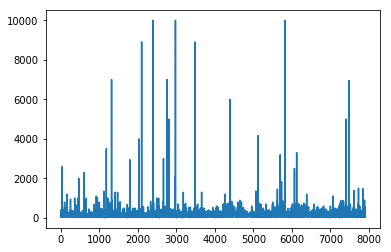

In [7]:
plt.plot(price)

In [27]:
hist = Counter(nbh_group)
hh = np.array(hist.values()).reshape(-1,1)

In [26]:
sp_data.iloc[2392]

id                                                          17831833
name                              Comfortable & Quiet Master Bedroom
host_id                                                     68223771
host_name                                                    Yolivia
neighbourhood_group                                      West Region
neighbourhood                                          Bukit Panjang
latitude                                                     1.34775
longitude                                                    103.772
room_type                                               Private room
price                                                          10000
minimum_nights                                                     1
number_of_reviews                                                  1
last_review                                               2017-05-27
reviews_per_month                                               0.04
calculated_host_listings_count    

<BarContainer object of 5 artists>

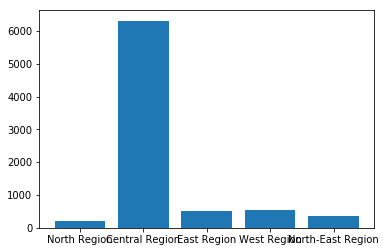

In [47]:
mm = list(hist.values())
plt.bar(list(hist.keys()),list(hist.values()))